### Multiclass Classification Project

Learning Goals
- How to read different size images from a directory?
- How to implement One-vs-one scheme for Multiclass classification?
- How to use SVM for image classifcation?
<img src="classes.png" alt="Classes" style="width: 700px;"/>


## Dataset Preparation

In [1]:
import numpy as np
import os 
from pathlib import Path
import cv2

In [2]:
import matplotlib.pyplot as plt

In [32]:
p = Path("../images/")

dirs = p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}

image_data = []
labels = []

for folder_dir in dirs:
    #print(folder_name)
    label = str(folder_dir).split("\\")[-1][:-1]
    
    
    for img_path in folder_dir.glob("*.jpg"):
        img_path=str(img_path).replace("\\","//")
        print(img_path)
        img=cv2.imread(img_path)
        rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        rgb_img=cv2.resize(rgb_img,(32,32))
        image_data.append(rgb_img)
        labels.append(labels_dict[label])
        

..//images//cats//cat.1.jpg
..//images//cats//cat.10.jpg
..//images//cats//cat.100.jpg
..//images//cats//cat.101.jpg
..//images//cats//cat.102.jpg
..//images//cats//cat.103.jpg
..//images//cats//cat.104.jpg
..//images//cats//cat.105.jpg
..//images//cats//cat.106.jpg
..//images//cats//cat.107.jpg
..//images//cats//cat.108.jpg
..//images//cats//cat.109.jpg
..//images//cats//cat.11.jpg
..//images//cats//cat.110.jpg
..//images//cats//cat.111.jpg
..//images//cats//cat.112.jpg
..//images//cats//cat.113.jpg
..//images//cats//cat.114.jpg
..//images//cats//cat.115.jpg
..//images//cats//cat.116.jpg
..//images//cats//cat.117.jpg
..//images//cats//cat.118.jpg
..//images//cats//cat.119.jpg
..//images//cats//cat.12.jpg
..//images//cats//cat.120.jpg
..//images//cats//cat.121.jpg
..//images//cats//cat.122.jpg
..//images//cats//cat.123.jpg
..//images//cats//cat.124.jpg
..//images//cats//cat.125.jpg
..//images//cats//cat.126.jpg
..//images//cats//cat.127.jpg
..//images//cats//cat.128.jpg
..//images//cat

..//images//dogs//dog.53.jpg
..//images//dogs//dog.54.jpg
..//images//dogs//dog.55.jpg
..//images//dogs//dog.56.jpg
..//images//dogs//dog.57.jpg
..//images//dogs//dog.58.jpg
..//images//dogs//dog.59.jpg
..//images//dogs//dog.6.jpg
..//images//dogs//dog.60.jpg
..//images//dogs//dog.61.jpg
..//images//dogs//dog.62.jpg
..//images//dogs//dog.63.jpg
..//images//dogs//dog.64.jpg
..//images//dogs//dog.65.jpg
..//images//dogs//dog.66.jpg
..//images//dogs//dog.67.jpg
..//images//dogs//dog.68.jpg
..//images//dogs//dog.69.jpg
..//images//dogs//dog.7.jpg
..//images//dogs//dog.70.jpg
..//images//dogs//dog.71.jpg
..//images//dogs//dog.72.jpg
..//images//dogs//dog.73.jpg
..//images//dogs//dog.74.jpg
..//images//dogs//dog.75.jpg
..//images//dogs//dog.76.jpg
..//images//dogs//dog.77.jpg
..//images//dogs//dog.78.jpg
..//images//dogs//dog.79.jpg
..//images//dogs//dog.8.jpg
..//images//dogs//dog.80.jpg
..//images//dogs//dog.81.jpg
..//images//dogs//dog.82.jpg
..//images//dogs//dog.83.jpg
..//images//dogs/

..//images//humans//rider-162.jpg
..//images//humans//rider-163.jpg
..//images//humans//rider-164.jpg
..//images//humans//rider-165.jpg
..//images//humans//rider-166.jpg
..//images//humans//rider-167.jpg
..//images//humans//rider-168.jpg
..//images//humans//rider-169.jpg
..//images//humans//rider-17.jpg
..//images//humans//rider-170.jpg
..//images//humans//rider-171.jpg
..//images//humans//rider-172.jpg
..//images//humans//rider-173.jpg
..//images//humans//rider-174.jpg
..//images//humans//rider-175.jpg
..//images//humans//rider-176.jpg
..//images//humans//rider-177.jpg
..//images//humans//rider-178.jpg
..//images//humans//rider-179.jpg
..//images//humans//rider-18.jpg
..//images//humans//rider-180.jpg
..//images//humans//rider-181.jpg
..//images//humans//rider-182.jpg
..//images//humans//rider-183.jpg
..//images//humans//rider-184.jpg
..//images//humans//rider-185.jpg
..//images//humans//rider-186.jpg
..//images//humans//rider-187.jpg
..//images//humans//rider-188.jpg
..//images//huma

In [4]:
# Convert this into numpy array
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Randomly Shuffle our Data!

In [5]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)


### Visualise this data!

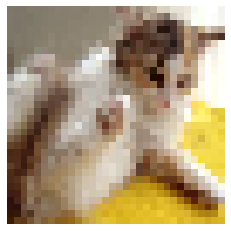

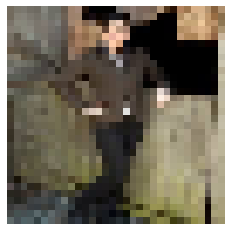

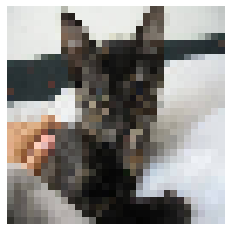

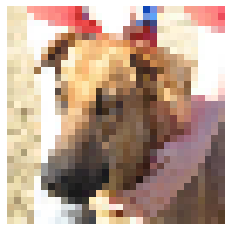

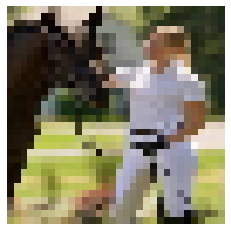

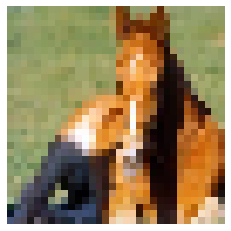

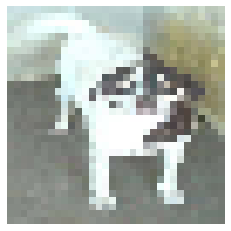

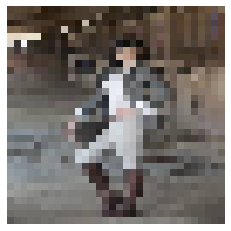

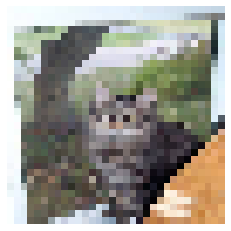

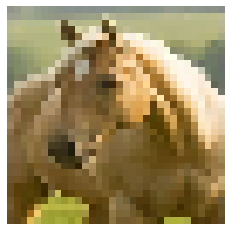

In [6]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

## SVM Classifier

In [7]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

## We need to convert data for One-for-One classifcation!

In [8]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [9]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [10]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [11]:
data = classWiseData(image_data,labels)

In [12]:
data

{0: array([[0.49411765, 0.4627451 , 0.41960785, ..., 0.84705883, 0.70980394,
         0.15294118],
        [0.84705883, 0.8627451 , 0.85882354, ..., 0.8156863 , 0.84313726,
         0.8901961 ],
        [0.9764706 , 0.99215686, 0.99607843, ..., 0.84705883, 0.6156863 ,
         0.3882353 ],
        ...,
        [0.45882353, 0.4745098 , 0.47843137, ..., 0.07843138, 0.08235294,
         0.05490196],
        [0.84705883, 0.8627451 , 0.85882354, ..., 0.8156863 , 0.84313726,
         0.8901961 ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ]], dtype=float32),
 1: array([[0.92941177, 0.8745098 , 0.72156864, ..., 0.34901962, 0.24705882,
         0.16470589],
        [0.7921569 , 0.8745098 , 0.8862745 , ..., 0.4509804 , 0.47058824,
         0.44705883],
        [0.11372549, 0.11372549, 0.1254902 , ..., 0.16862746, 0.23137255,
         0.25882354],
        ...,
        [0.05882353, 0.07450981, 0.01176471, ..., 0.5058824 , 0.5137255 ,
         0.27

In [13]:
"""print(data[0].shape)
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])
"""

'print(data[0].shape)\nprint(data[1].shape[0])\nprint(data[2].shape[0])\nprint(data[3].shape[0])\n'

In [14]:
def getDataPairForSVM(d1,d2):
    """Combines Data of two classes into a signle matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels
    

## Training  NC2 SVM's Part!

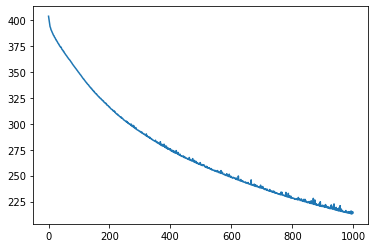

In [15]:
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)


In [16]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

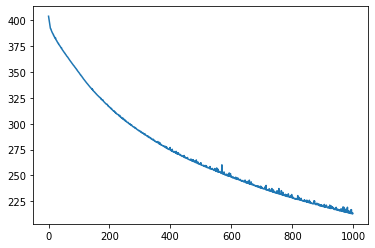

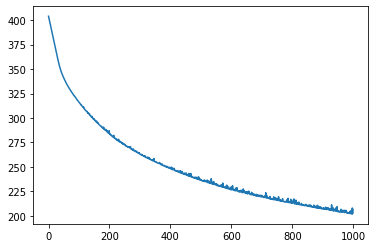

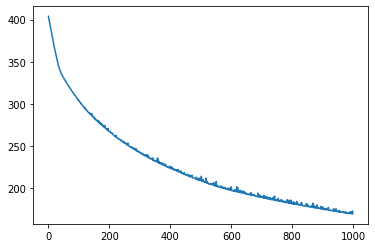

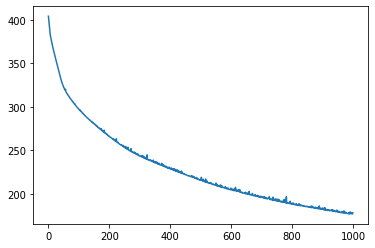

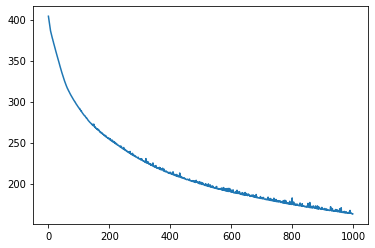

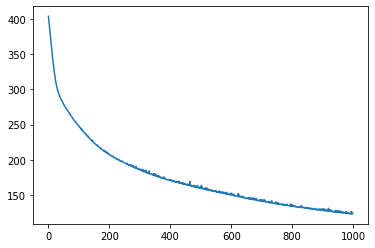

In [17]:
svm_classifiers = trainSVMs(image_data,labels)

In [28]:
svm_classifiers[0]

{1: (array([[ 0.02527347,  0.04113711,  0.04419766, ..., -0.0314769 ,
          -0.03109089, -0.03509075]]),
  0.10450000000000004),
 2: (array([[-0.03458654, -0.02378123, -0.02083601, ..., -0.04112059,
          -0.03143538, -0.05201645]]),
  -0.02098999999999997),
 3: (array([[ 0.00406001,  0.01188408,  0.01376735, ..., -0.01684033,
          -0.0164277 , -0.01444107]]),
  0.07748000000000028)}

In [18]:
#Parameters for Cats and dogs
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
0.10450000000000004


## Prediction

In [19]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [20]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [21]:
print(predict(image_data[0]))
print(labels[0])

0
0


In [22]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [29]:
accuracy(image_data,labels)

0.5977722772277227

## Improving accuracy

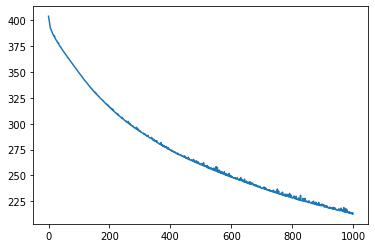

In [31]:
#Alter the values of learning rate and max iterations to improve accuracy
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)


# SVM using SK-learn 



In [25]:
from sklearn import svm

In [26]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [27]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6485148514851485

In [34]:
image_data

[array([[[ 33,  37,  41],
         [ 38,  42,  40],
         [ 35,  43,  43],
         ...,
         [ 72,  79, 105],
         [ 91,  98, 124],
         [177, 174, 158]],
 
        [[ 37,  41,  44],
         [ 43,  48,  45],
         [ 38,  47,  46],
         ...,
         [ 75,  83, 102],
         [ 79,  87, 106],
         [179, 174, 150]],
 
        [[ 32,  41,  40],
         [ 36,  45,  44],
         [ 37,  46,  45],
         ...,
         [ 76,  86,  99],
         [ 73,  84,  91],
         [168, 161, 145]],
 
        ...,
 
        [[ 17,  17,  17],
         [ 15,  15,  15],
         [ 13,  13,  13],
         ...,
         [ 89,  75,  65],
         [ 84,  70,  59],
         [ 34,  19,  15]],
 
        [[ 24,  24,  24],
         [ 25,  25,  25],
         [ 25,  25,  25],
         ...,
         [ 72,  63,  56],
         [ 84,  75,  68],
         [ 97,  82,  77]],
 
        [[ 19,  17,  18],
         [ 20,  18,  19],
         [ 26,  25,  23],
         ...,
         [ 62,  45,  38],
  